In [38]:
# Dependencies
%matplotlib inline
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import seaborn as sns


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [39]:
# Target Search Term
news_accounts = ["@BBC", "@CBS", "@CNN","@FoxNews", "@nytimes"]

# Create dictionary to hold text information
tweet_dict = {
    "account": [],
    "text": [],
    "date": [],
    "compound_score": [],
    "pos_score": [],
    "neu_score": [],
    "neg_score": []
}

# Grab 100 tweets from each account
for x in range(5):
    
    # Loop through all news accounts
    for account in news_accounts:
        
        # Grab the tweets
        tweets = api.user_timeline(account, page=x)
    
        # For each tweet store it into the dictionary
        for tweet in tweets:
            
            # All data is grabbed from the JSON returned by Twitter
            tweet_dict["account"].append(tweet["user"]["name"])
            tweet_dict["text"].append(tweet["text"])
            tweet_dict["date"].append(tweet["created_at"])
            
            # Run sentiment analysis on each tweet using Vader
            tweet_dict["compound_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_dict["pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_dict["neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_dict["neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

In [40]:
# Store the final contents into a DataFrame
tweet_df = pd.DataFrame(tweet_dict, columns=["account", 
                                             "text", 
                                             "date",
                                             "compound_score",
                                             "pos_score",
                                             "neu_score",
                                             "neg_score"])
# Export to CSV
#file_name = str(time.strftime("%m-%d-%y")) + "-tweets.csv"
#tweet_df.to_csv("TweetMood_DataFrame.csv", index=false)

# Visualize the DataFrame
tweet_df.head()


,account,text,date,compound_score,pos_score,neu_score,neg_score
0,BBC,RT @bbcasiannetwork: How much do you know abou...,Sat Nov 10 21:45:22 +0000 2018,-0.3182,0.0,0.892,0.108
1,BBC,RT @BBCWorld: Leaders of France and Germany si...,Sat Nov 10 21:45:03 +0000 2018,0.0000,0.0,1.000,0.000
2,BBC,For everyone who grew up on a council estate.....,Sat Nov 10 20:07:04 +0000 2018,0.0000,0.0,1.000,0.000
3,BBC,"After 26 years, @MimShaikh_ is looking for the...",Sat Nov 10 19:09:04 +0000 2018,0.0000,0.0,1.000,0.000
4,BBC,Some 250 big organisations have now pledged to...,Sat Nov 10 18:03:02 +0000 2018,-0.4215,0.0,0.872,0.128


In [41]:
# Check count of number of tweets
tweet_df.count()

account           499
text              499
date              499
compound_score    499
pos_score         499
neu_score         499
neg_score         499
dtype: int64

In [42]:
# Obtain the source names for reference
tweet_df["account"].unique()

array(['BBC', 'CBS', 'CNN', 'Fox News', 'The New York Times'],
      dtype=object)

In [43]:
# Convert dates (currently strings) into datetimes
tweet_df["date"] = pd.to_datetime(tweet_df["date"])

In [44]:
# Sort the dataframe by date
tweet_df.sort_values("date", inplace=True)

In [45]:
# Preview the data to confirm data is sorted
tweet_df.head()

,account,text,date,compound_score,pos_score,neu_score,neg_score
438,CBS,#MichaelJacksonHalloween looks like the best k...,2018-10-21 01:00:00,0.7901,0.500,0.500,0.000
437,CBS,"Hey West Coast, a magical adventure of persona...",2018-10-21 03:00:00,0.3818,0.205,0.795,0.000
436,CBS,Michael Jackson's greatest hits and characters...,2018-10-21 06:00:00,0.8858,0.409,0.591,0.000
435,CBS,Make your Sunday a touchdown with @NFL on CBS....,2018-10-21 14:00:01,0.0000,0.000,1.000,0.000
434,CBS,Due to #NFL football overrun #CBS Sunday sched...,2018-10-21 23:44:42,-0.2263,0.000,0.905,0.095


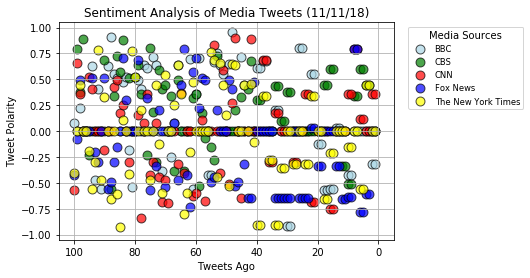

In [74]:
# Build scatter plot for tracking tweet polarity by tweet history
# Note how a few data munging tricks were used to obtain (-100 -> 0 tick marks)
plt.scatter(np.arange(-len(tweet_df[tweet_df["account"] == "BBC"]), 0, 1), 
            tweet_df[tweet_df["account"] == "BBC"]["compound_score"],
            edgecolor="black", linewidths=1, marker="o", color="lightblue", s=80,
            alpha=0.7, label="BBC")

plt.scatter(np.arange(-len(tweet_df[tweet_df["account"] == "CBS"]), 0, 1), 
            tweet_df[tweet_df["account"] == "CBS"]["compound_score"],
            edgecolor="black", linewidths=1, marker="o", color="green", s=80,
            alpha=0.7, label="CBS")

plt.scatter(np.arange(-len(tweet_df[tweet_df["account"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["account"] == "CNN"]["compound_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=80,
            alpha=0.7, label="CNN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["account"] == "Fox News"]), 0, 1), 
            tweet_df[tweet_df["account"] == "Fox News"]["compound_score"],
            edgecolor="black", linewidths=1, marker="o", color="blue", s=80,
            alpha=0.7, label="Fox News")

plt.scatter(np.arange(-len(tweet_df[tweet_df["account"] == "The New York Times"]), 0, 1), 
            tweet_df[tweet_df["account"] == "The New York Times"]["compound_score"],
            edgecolor="black", linewidths=1, marker="o", color="yellow", s=80,
            alpha=0.7, label="The New York Times")

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

# Create a legend
legend = plt.legend(fontsize="small",
                  loc="upper right",bbox_to_anchor=(1.4, 1), title="Media Sources")

plt.show()

In [48]:
# Save the figure (and account for the legend being outside the plot when saving)

In [75]:
# Average all polarities by news source
tweet_df_avg_polarity = tweet_df.groupby(["account"]).mean()["compound_score"]

# View the polarities
pd.DataFrame(tweet_df_avg_polarity)

,compound_score
account,
BBC,0.123919
CBS,0.163892
CNN,0.005074
Fox News,-0.116200
The New York Times,-0.047622


In [51]:
# View the polarities